<a href="https://colab.research.google.com/github/Olando-sys/Olando-sys/blob/main/Weight_Height_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Uploading the dataset csv
from google.colab import files
uploaded = files.upload()

Saving weightheight.csv to weightheight.csv


In [ ]:
#Loading the dataset
df = pd.read_csv('weightheight.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
#Checking dataset for duplicates and missing values
duplicates = df.duplicated().sum()
missing_values = df.isnull().sum()

duplicates, missing_values


(0,
 Gender    0
 Height    0
 Weight    0
 dtype: int64)

The dataset has no duplicates or missing values

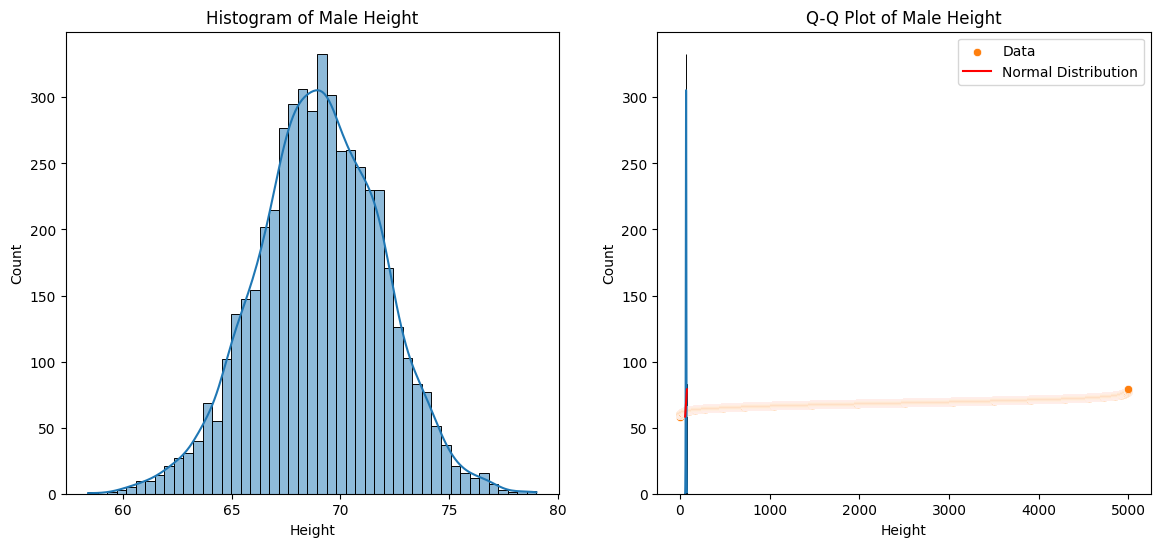

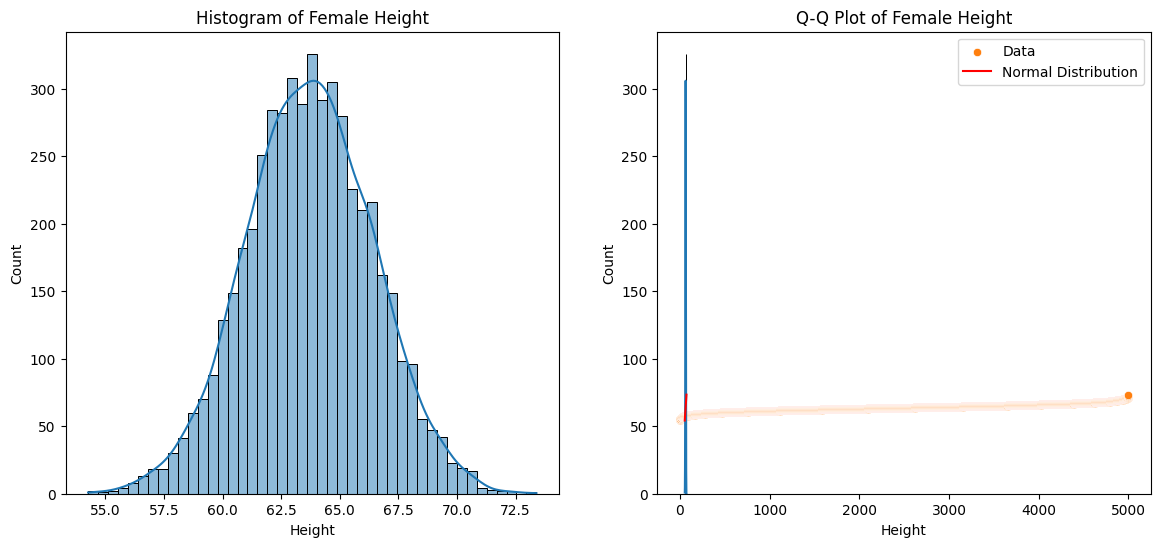

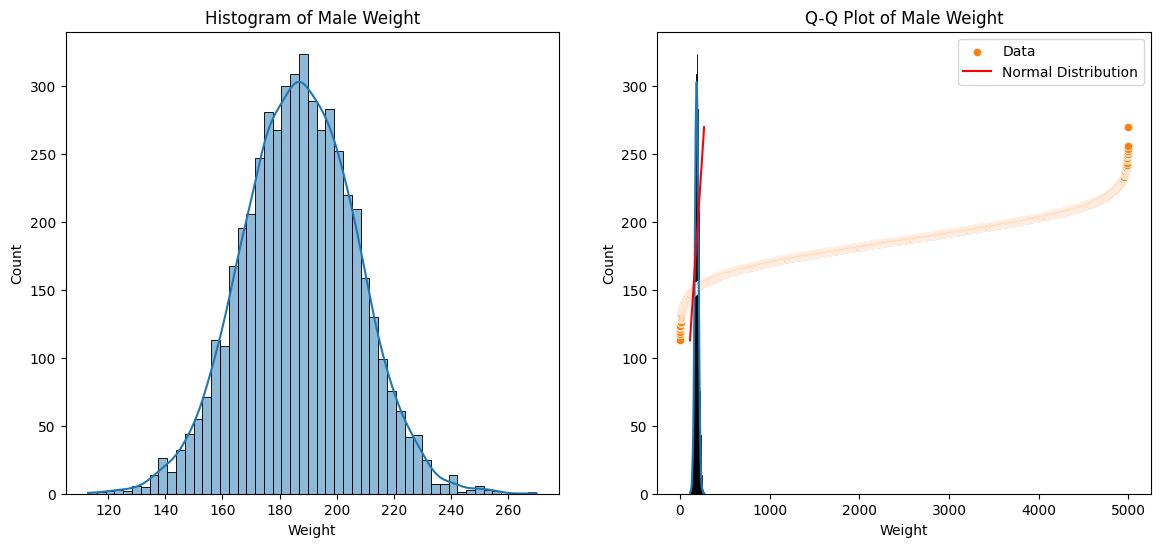

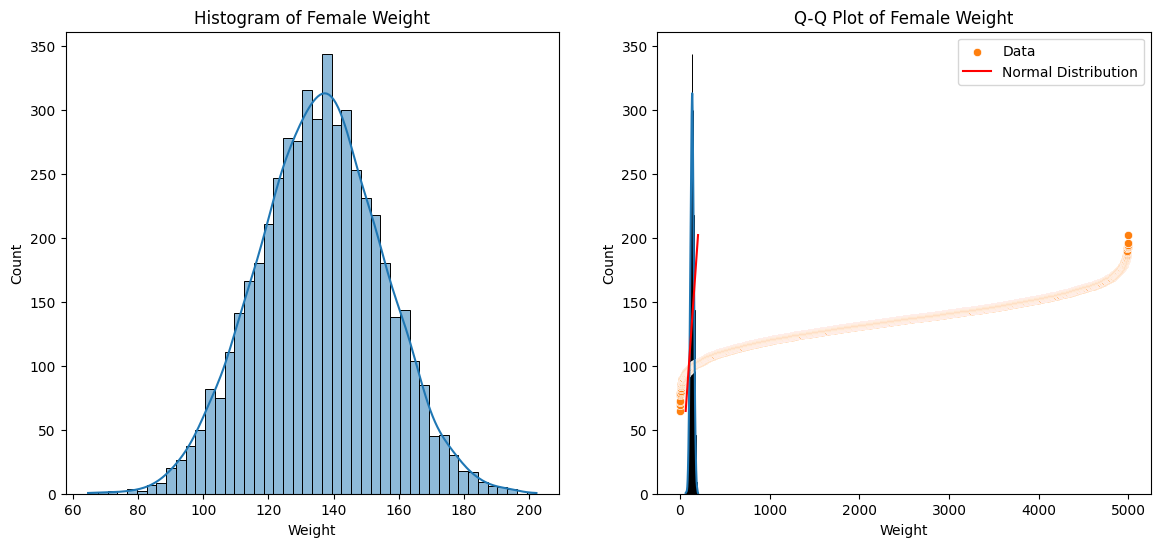

Shapiro-Wilk Test Results:
Male Height: Statistic=0.9994430951307778, p-value=0.1401843470168178
Female Height: Statistic=0.9997746292658082, p-value=0.9021989159282784
Male Weight: Statistic=0.9995865228794405, p-value=0.38280411020259264
Female Weight: Statistic=0.9997803936836288, p-value=0.9134276046763626


In [ ]:
#Checking for normality of distribution starts here
from scipy.stats import shapiro
# Separate the dataset by gender
df_male = df[df['Gender'] == 'Male']
df_female = df[df['Gender'] == 'Female']

# Function to check normality
def check_normality(data, variable_name):
    # Graphical check using histogram and Q-Q plot
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(data, kde=True)
    plt.title(f'Histogram of {variable_name}')

    plt.subplot(1, 2, 2)
    sns.histplot(data, kde=True)
    plt.title(f'Q-Q Plot of {variable_name}')
    sns.scatterplot(data=pd.Series(data).sort_values().values, label='Data')
    sns.lineplot(x=pd.Series(data).sort_values().values, y=pd.Series(data).sort_values().values, color="red", label="Normal Distribution")
    plt.legend()

    plt.show()

    # Mathematical check using Shapiro-Wilk test
    stat, p_value = shapiro(data)
    return stat, p_value

# Check normality for height and weight for both genders
normality_male_height = check_normality(df_male['Height'], "Male Height")
normality_female_height = check_normality(df_female['Height'], "Female Height")
normality_male_weight = check_normality(df_male['Weight'], "Male Weight")
normality_female_weight = check_normality(df_female['Weight'], "Female Weight")

print("Shapiro-Wilk Test Results:")
print(f"Male Height: Statistic={normality_male_height[0]}, p-value={normality_male_height[1]}")
print(f"Female Height: Statistic={normality_female_height[0]}, p-value={normality_female_height[1]}")
print(f"Male Weight: Statistic={normality_male_weight[0]}, p-value={normality_male_weight[1]}")
print(f"Female Weight: Statistic={normality_female_weight[0]}, p-value={normality_female_weight[1]}")



The histogram and Q-Q plot suggest that the distribution of height for males is approximately normal.
The test statistic is 0.9994, and the p-value is 0.1420. Since the p-value is greater than 0.05, we fail to reject the null hypothesis, indicating that the height data for males is normally distributed.
The histogram and Q-Q plot suggest that the distribution of height for females is approximately normal.
The test statistic is 0.9998, and the p-value is 0.9048. With a p-value greater than 0.05, the height data for females can be considered normally distributed.
The histogram and Q-Q plot suggest that the distribution of weight for males is approximately normal.
The test statistic is 0.9996, and the p-value is 0.3892. The p-value greater than 0.05 indicates that the weight data for males is normally distributed.
The histogram and Q-Q plot suggest that the distribution of weight for females is approximately normal.
The test statistic is 0.9998, and the p-value is 0.9181. This p-value supports that the weight data for females is normally distributed.



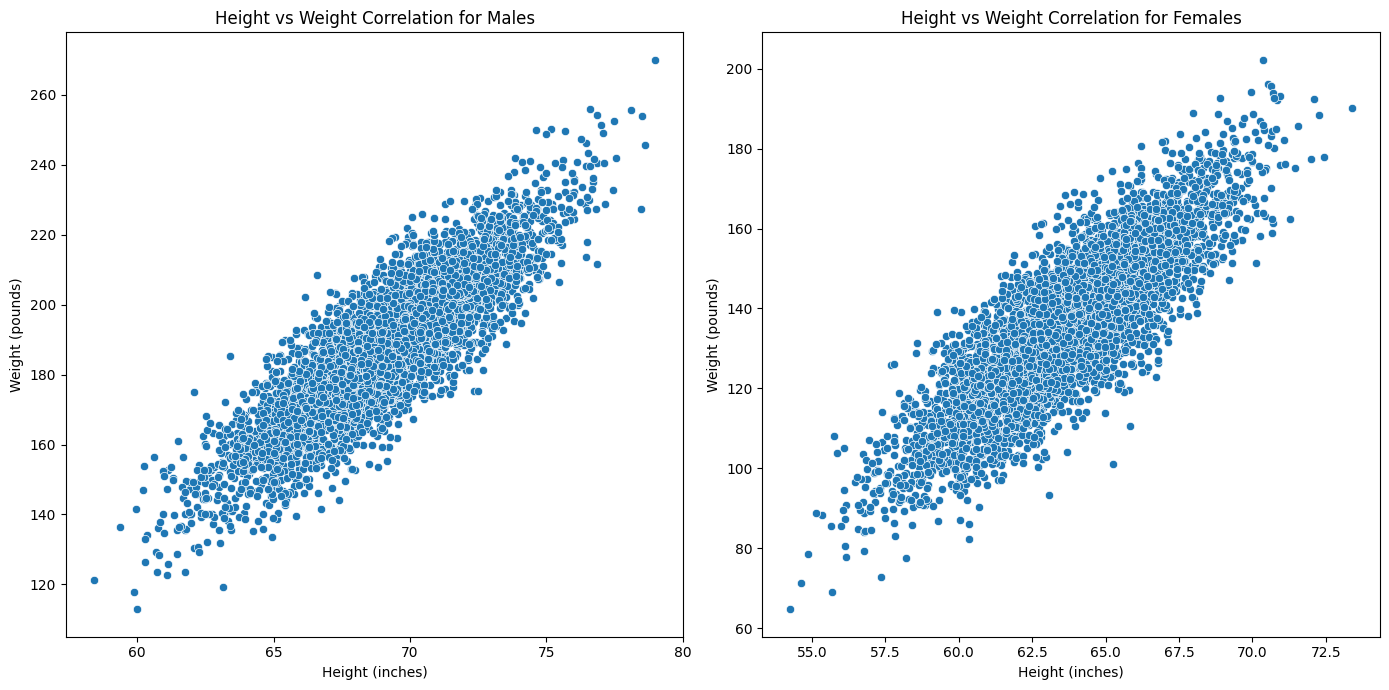

(0.8629788486163166, 0.8496085914185997)

In [ ]:
#creating a height-weight corelation chart for both genders
plt.figure(figsize=(14, 7))

# Male correlation chart
plt.subplot(1, 2, 1)
sns.scatterplot(x='Height', y='Weight', data=df_male)
plt.title('Height vs Weight Correlation for Males')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')

# Female correlation chart
plt.subplot(1, 2, 2)
sns.scatterplot(x='Height', y='Weight', data=df_female)
plt.title('Height vs Weight Correlation for Females')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')

plt.tight_layout()
plt.show()

# Calculating correlation coefficients
correlation_male = df_male[['Height', 'Weight']].corr().iloc[0, 1]
correlation_female = df_female[['Height', 'Weight']].corr().iloc[0, 1]

correlation_male, correlation_female

The dataset reflects typical human height and weight distributions, with expected differences between genders. The strong correlation between height and weight suggests that these two variables are closely related, which is useful in various predictive models and practical applications. Understanding these relationships helps in making informed decisions in health, design, and lifestyle choices.
